# Smith Kaart Oefening 6

In [1]:
from cursusdef import *

## Opgave Oefening

Een [2.4 GHz yagi PCB antenne](https://www.ti.com/lit/an/swra350/swra350.pdf) heeft bij 2.4 GHz een impedantie van 39.371 + j 9.5971 Ohm. We willen deze antenne aanpassen aan een baantje van 50 Ohm op een PCB. De golflengte van dat baantje bij 2.4 GHz is 6.7 cm. Hiervoor willen we een zo kort mogelijk stukje open transmissielijn zo kort mogelijk bij het aansluitingspunt van de antenna. Welke oplossing kies je en waarom?

## Oplossing

We plaatsen de waarde van $Z_L/Z_o$ (dit is 0.79 + j 0.19) op de Smith kaart van de impedantie en we draaien tot we de cirkel waarbij het reele deel van admittantie 1 is tegenkomen. Dit ziet er uit als in {numref}`smith61`. Aangezien de cirkel met admittantie 1 niet aanwezig is op de Smith kaart van de impedantie, kunnen we beter het spiegelbeeld plotten op de Smith kaart van de admittantie. Dit zien we in {numref}`smith62`

In [ ]:
(39.371 + 9.5971j)/50

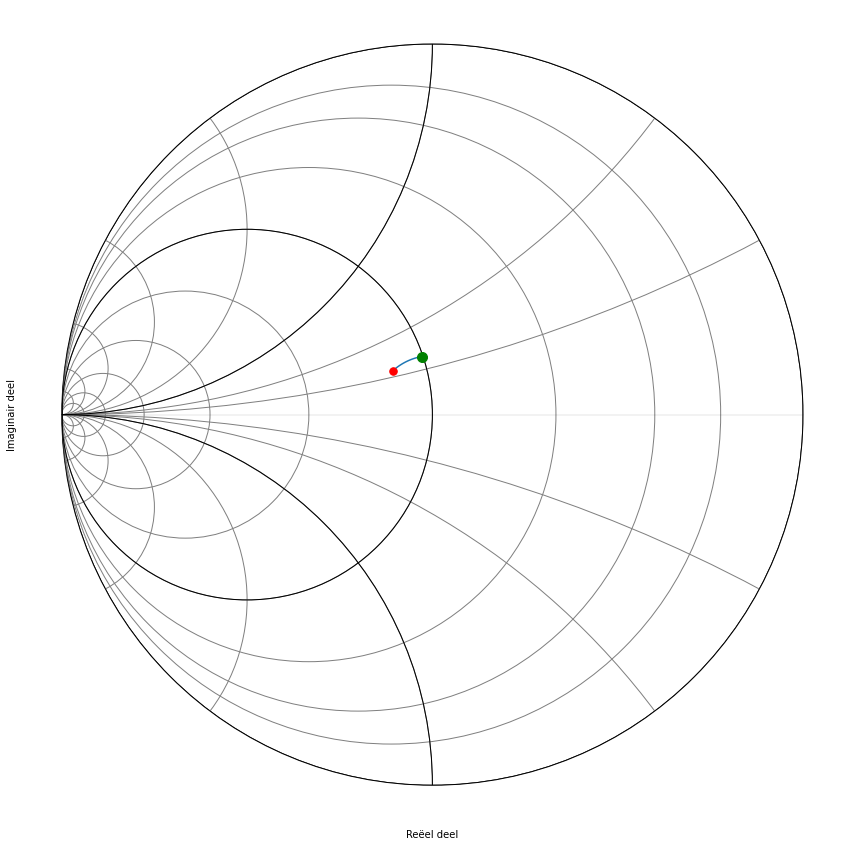

In [2]:
Z_L = 39.371 + 9.5971j
Z_0 = 50
f_0_str = '2.4GHz'
freq = rf.Frequency(start=1.1, stop=1.3, npoints=51, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,30)]
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
smitplot(zlijn,Z_0,tt='y')

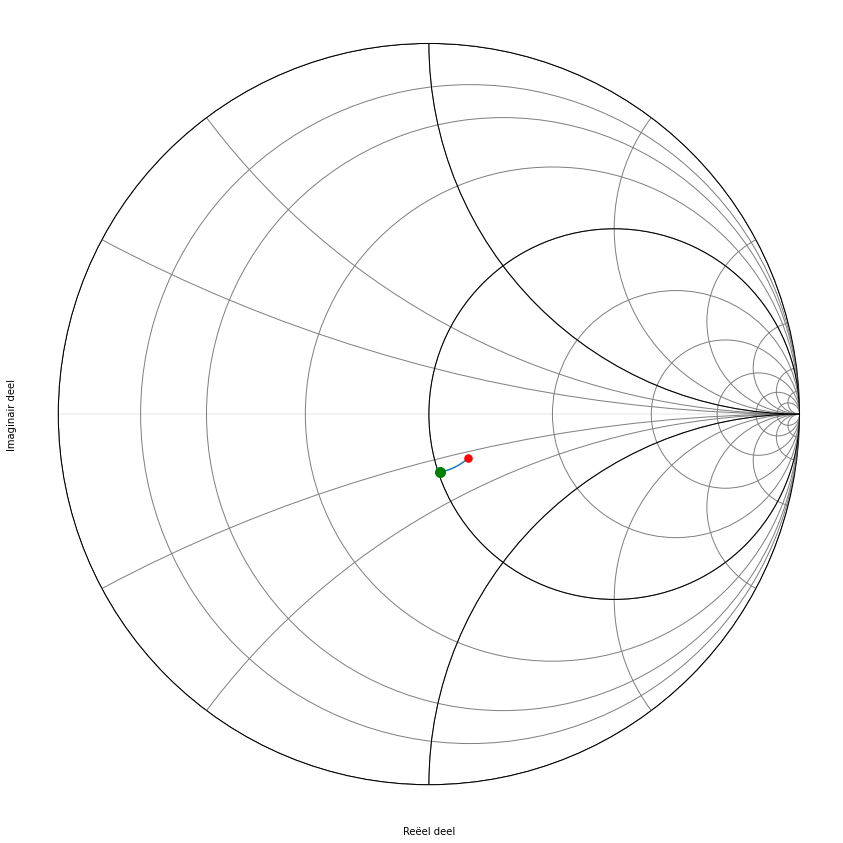

In [13]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,30)]
smitplot(ylijn,Y_0)

We kijken nu welke hoek we moeten draaien om deze cirkel te snijden. 
Aangezien de opgave was om dit zo kort mogelijk bij de belasting te doen, kiezen we voor het eerste snijpunt.
Op de kaart lezen we af dat dit al ongeveer 30 na graden is. Dat is 1/12 van de volledige omtrek van de cirkel Als een gevolg gaat de lengte van de transmissielijn 1/24 deel van de golflengte zijn. We hebben dus een stukje van 2.8 mm nodig. In de tabel hieronder zien we dit in meer detail uitgewerkt:


###### Berekening admittantie voor verschillende lengtes

In [3]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(28,32)]
def ylijnprint(ylijn,golflengte=6.7):
    print('hoek    admittantie (Siemens)     lengte baantje op PCB (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS            lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte baantje op PCB (cm)
  28    Y= 20.26-6.49j mS            lengte=0.26 cm
  29    Y= 20.14-6.48j mS            lengte=0.27 cm
  30    Y= 20.01-6.46j mS            lengte=0.28 cm
  31    Y= 19.89-6.44j mS            lengte=0.29 cm


In [ ]:
-6.48/1000*50

Het imaginair gedeelte van de y waarde die we op de kaart aflezen is y=-0.324 j. We moeten dit dus compenseren door een imaginair deel van y=+0.324 j van de open transmissielijn.
We starten dus de cirkelboog bij y=0 (zie oranje lijn in {numref}`smith63`) en kijken waar deze de waarde van y=+0.324 j snijdt op de Smith kaart. De lengte van de boog die we hiervoor nodig hebben is 33 graden. Dit komt overeen met een lengte van 3.1 mm.

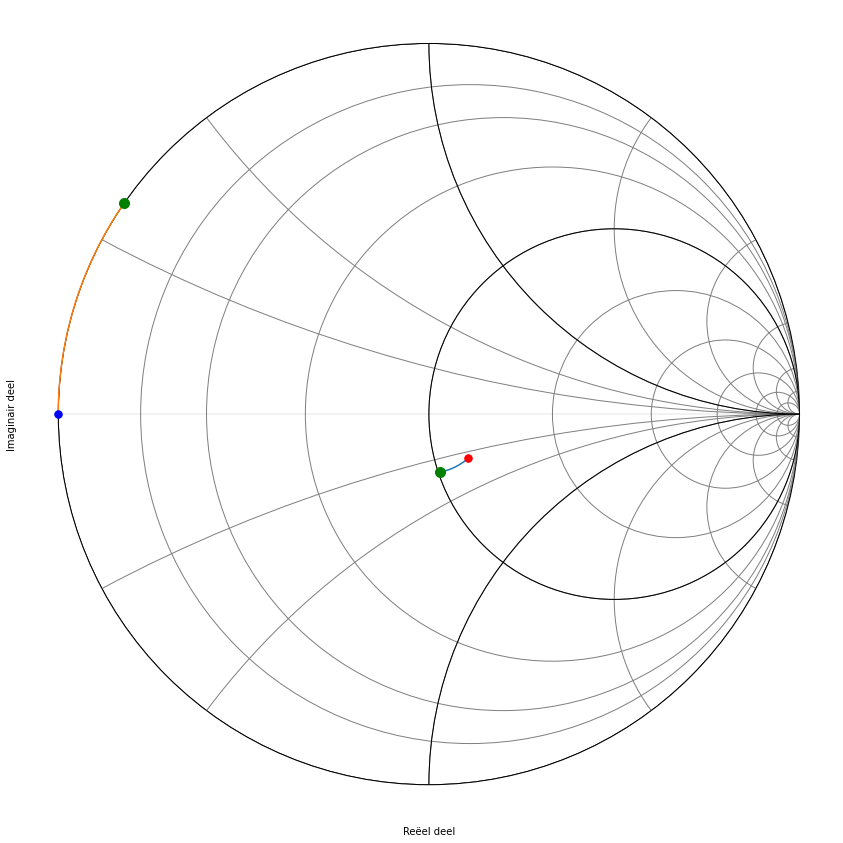

In [18]:
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,33)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

We kunnen dit ook in tabelvorm uitwerken. Dit zie je dan hieronder weergegeven.

In [4]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(30,35)]

def ylijnprint2(ylijn,golflengte=6.7):
    print('hoek    admittantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admittantie (Siemens)     lengte coax (cm)
  30       Y= +5.83j mS     lengte=0.28 cm
  31       Y= +6.04j mS     lengte=0.29 cm
  32       Y= +6.24j mS     lengte=0.30 cm
  33       Y= +6.45j mS     lengte=0.31 cm
  34       Y= +6.66j mS     lengte=0.32 cm


{numref}`smith6cir` toont het schema dat we nodig hebben om deze oplossing te realiseren

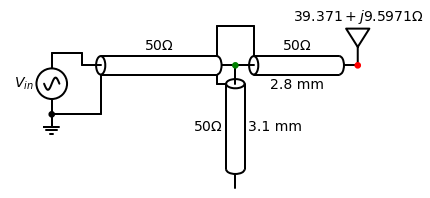

In [19]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$50\Omega$'))
d.add(elm.Dot,color='g')
coax3=d.add(elm.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$50\Omega$', botlabel='3.1 mm'))
d.add(elm.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(elm.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$50\Omega$', botlabel='2.8 mm'))
d.add(elm.Dot,color='r')
d.add(elm.Antenna( label='$39.371 + j 9.5971\Omega$'))
d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()